In [1]:
import pandas as pd

file_path = "trace_220521-10-1.xls"

df = pd.read_excel(file_path)

In [2]:
df = df.drop('File Name',axis=1)
df.head()

,SPKC01 Timestamps,SPKC01 Values,SPKC01 St. Dev.,SPKC03 Timestamps,SPKC03 Values,SPKC03 St. Dev.,SPKC04 Timestamps,SPKC04 Values,SPKC04 St. Dev.,SPKC05 Timestamps,...,SPKC06 St. Dev.,SPKC07 Timestamps,SPKC07 Values,SPKC07 St. Dev.,SPKC08 Timestamps,SPKC08 Values,SPKC08 St. Dev.,SPKC09 Timestamps,SPKC09 Values,SPKC09 St. Dev.
0,-0.010000,0.001022,0.005665,-0.010000,-0.000427,0.009169,-0.010000,-0.000572,0.006310,-0.010000,...,0.014356,-0.010000,-0.000694,0.006620,-0.010000,0.000290,0.005693,-0.010000,0.001564,0.008430
1,-0.009975,0.000969,0.006653,-0.009975,-0.000275,0.008979,-0.009975,-0.001160,0.005826,-0.009975,...,0.013989,-0.009975,-0.000694,0.006771,-0.009975,0.000275,0.004703,-0.009975,0.000275,0.008289
2,-0.009950,0.000832,0.007532,-0.009950,0.000603,0.009690,-0.009950,-0.001328,0.004872,-0.009950,...,0.014148,-0.009950,0.000488,0.006951,-0.009950,-0.000443,0.003982,-0.009950,-0.000061,0.008079
3,-0.009925,0.000633,0.008442,-0.009925,0.001495,0.010840,-0.009925,-0.001221,0.003535,-0.009925,...,0.013157,-0.009925,0.002029,0.007613,-0.009925,-0.000374,0.005043,-0.009925,0.000488,0.007200
4,-0.009900,0.000999,0.009132,-0.009900,0.001595,0.011049,-0.009900,-0.001190,0.003794,-0.009900,...,0.012589,-0.009900,0.002785,0.007689,-0.009900,0.000816,0.005664,-0.009900,0.001221,0.006691


In [3]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

Dropdown(description='Channel:', options=('SPKC01', 'SPKC03', 'SPKC04', 'SPKC05', 'SPKC06', 'SPKC07', 'SPKC08'…

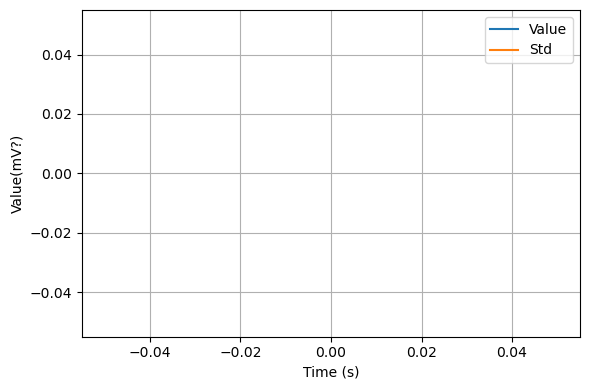

In [4]:

# options作成
options = list(dict.fromkeys(label.split(' ')[0] for label in df.columns))
dropdown = widgets.Dropdown(options=options, description='Channel:', value=options[0])
display(dropdown)

# FigureとAxesを作成
fig, ax = plt.subplots(figsize=(6,4))
line_val, = ax.plot([], [], '-', label='Value')
line_std, = ax.plot([], [], '-', label='Std')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Value(mV?)')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

# 更新関数
def update_plot(spk):
    label_val = spk + " Values"
    label_std = spk + " St. Dev."
    label_t = spk + " Timestamps"

    line_val.set_data(df[label_t], df[label_val])
    line_std.set_data(df[label_t], df[label_std])

    # 軸範囲を更新
    ax.relim()
    ax.autoscale_view()
    ax.set_title(spk + " Waveform")
    fig.canvas.draw()

# コールバック
def on_change(change):
    if change['name'] == 'value':
        update_plot(change['new'])
        
dropdown.observe(on_change)


# 初期表示
update_plot(dropdown.value)

In [5]:
dropdown = widgets.Dropdown(options=options, description='Channel:', value=options[0])

def in_change(change):
    if change['name'] == 'value':
        print('a')
dropdown.observe(in_change)
display(dropdown)

Dropdown(description='Channel:', options=('SPKC01', 'SPKC03', 'SPKC04', 'SPKC05', 'SPKC06', 'SPKC07', 'SPKC08'…

In [6]:
def make_dropdown(df):
    dropdown = widgets.Dropdown(options=['SPKC01','SPKC02'])
    
    # 内部関数をコールバックとして設定
    def on_change(change):
        print("a")
        if change['name'] == 'value':
            print("選択された値:", change['new'])

    dropdown.observe(on_change)
    display(dropdown)

In [8]:
import ipywidgets as widgets
from IPython.display import display

def make_dropdown():
    dropdown = widgets.Dropdown(
        options=['SPKC01', 'SPKC02'],
        description='選択:'
    )
    
    # 内部関数（コールバック）を設定
    def on_change(change):
        if change['name'] == 'value' and change['new'] is not None:
            print("選択された値:", change['new'])

    dropdown.observe(on_change, names='value')  # ← names='value' を明示する
    display(dropdown)

make_dropdown()

Dropdown(description='選択:', options=('SPKC01', 'SPKC02'), value='SPKC01')